In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

nba_file_path = '/content/drive/MyDrive/Colab Notebooks/Project/nbaStateEDA/nba_state.csv'

df_nba = pd.read_csv(nba_file_path)
df_nba.columns = df_nba.columns.str.strip()

print(df_nba.head())
print(df_nba.info())
print(df_nba.describe())

## Draft

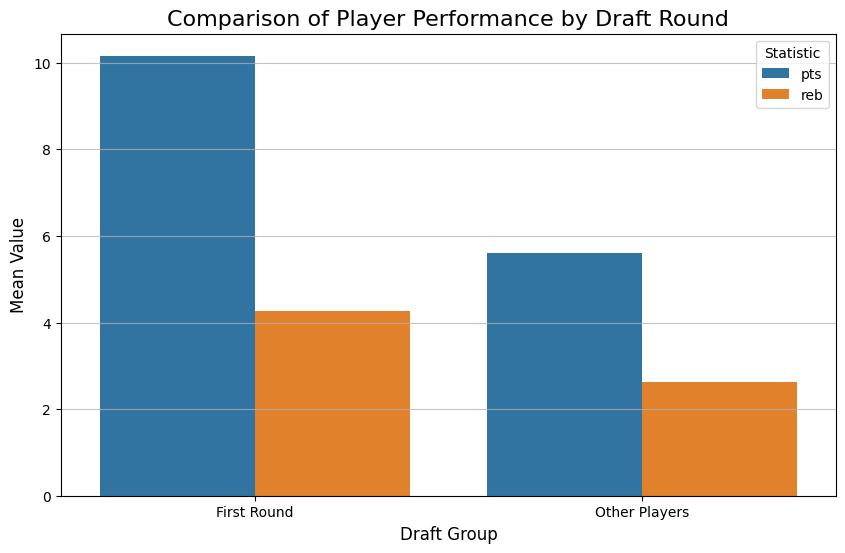

In [8]:
# Clean and prepare the draft data
df_nba['draft_round'] = df_nba['draft_round'].replace('Undrafted', '0')
df_nba['draft_number'] = df_nba['draft_number'].replace('Undrafted', '0')

df_nba['draft_round'] = pd.to_numeric(df_nba['draft_round'])
df_nba['draft_number'] = pd.to_numeric(df_nba['draft_number'])

# Create a column to group players for comparison
df_nba['draft_group'] = df_nba['draft_round'].apply(lambda x: 'First Round' if x == 1 else 'Other Players')

# Calculate the mean stats for each group
grouped_stats = df_nba.groupby('draft_group')[['pts', 'reb']].mean().reset_index()

# Reshape the data for plotting a grouped bar chart
melted_stats = pd.melt(grouped_stats, id_vars='draft_group', var_name='stat', value_name='mean_value')

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_stats, x='draft_group', y='mean_value', hue='stat')

plt.title('Comparison of Player Performance by Draft Round', fontsize=16)
plt.xlabel('Draft Group', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.legend(title='Statistic')
plt.grid(axis='y', alpha=0.75)
plt.savefig('draft_comparison_bar_chart.png')



Based on the data analysis, a clear relationship exists between a player's draft position and their on-court performance. The bar chart, comparing first-round picks to all other players, visually demonstrates that those selected earlier in the draft have significantly higher average points and rebounds. This suggests that a player's draft round serves as a strong predictor of their potential success in the NBA. Therefore, being chosen in the first round is a reliable indicator of a player's talent and ability to perform at a higher level. This finding supports the widely held belief that early draft picks are often the most impactful players for their teams.









## Hidden Stars

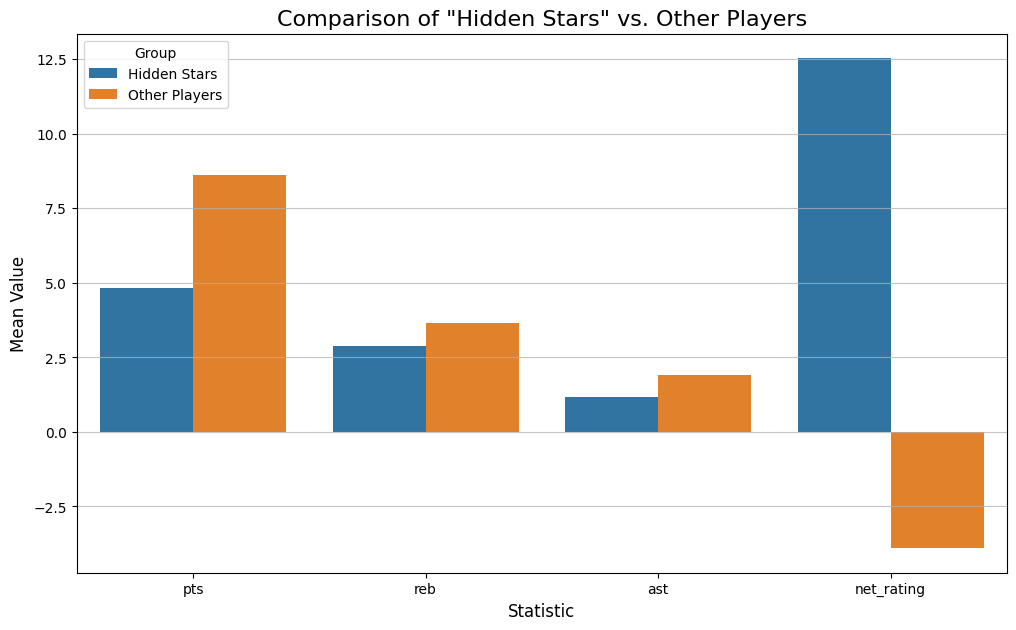

In [9]:

# Filter the data to identify "Hidden Stars" and other players ---

hidden_stars = df_nba[(df_nba['net_rating'] > 5) & (df_nba['pts'] < 10)]
other_players = df_nba[~((df_nba['net_rating'] > 5) & (df_nba['pts'] < 10))]

# Calculate the mean stats for both groups
stats_to_compare = ['pts', 'reb', 'ast', 'net_rating']
hidden_stars_mean = hidden_stars[stats_to_compare].mean()
other_players_mean = other_players[stats_to_compare].mean()

# Combine the results into a single DataFrame for easier plotting
comparison_df = pd.DataFrame({
    'Hidden Stars': hidden_stars_mean,
    'Other Players': other_players_mean
}).reset_index()
comparison_df.rename(columns={'index': 'Stat'}, inplace=True)

# Reshape the data and plot the bar chart ---
melted_comparison = comparison_df.melt('Stat', var_name='Group', value_name='Mean Value')

plt.figure(figsize=(12, 7))
sns.barplot(data=melted_comparison, x='Stat', y='Mean Value', hue='Group')

plt.title('Comparison of "Hidden Stars" vs. Other Players', fontsize=16)
plt.xlabel('Statistic', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.legend(title='Group')
plt.grid(axis='y', alpha=0.75)
plt.savefig('hidden_stars_comparison_bar_chart.png')



Based on the analysis, players identified as "hidden stars" demonstrate a significant impact on their teams despite scoring low points. The bar chart shows that while their average points are much lower, their net rating is considerably higher than other players. This suggests that their value comes from contributions in other areas, such as rebounds and assists. The data confirms that a player's true impact on a team's success goes beyond their scoring ability.







